##### <strong>Target:</strong>
- 'Binge.Eating.Disorder'

##### <strong>Parameters:</strong>
1. Cross Validation nubmer: 5 (just inner loop for quick result)
2. n_estimator: 100
3. max_depth: 5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, log_loss

#### 1. Raw GPS data

In [3]:
my_data = pd.read_csv('/home/ubuntu/SEOYOON/KSAD/KSAD_GPS_TOTAL_v2.csv', header=0)
my_data['KEY'] = my_data['KEY'].astype(str)
len(my_data)

4567

In [4]:
target = 'Binge.Eating.Disorder'
my_data = my_data.dropna(subset=[target])
len(my_data)

4521

#### CONSTANTS:

In [5]:
k_fold = 5

num_samples = len(my_data)
each_fold_size = int(num_samples/k_fold) +1

print('num_samples: ', num_samples)
print('fold_size: ', each_fold_size)

num_samples:  4521
fold_size:  905


#### PARAMETERS:

In [6]:
X = my_data.iloc[:, 1:27]
features = X.columns
X.head()

,AD,ADHD,ASD,ASP,BIP,BMI,CANNABIS,CP,DEPRESSION,DRINK,...,IQ,MDD,NEUROTICISM,PTSD,RISK4PC,RISKTOL,SCZ,SMOKER,SNORING,WORRY
0,-5.780160,0.000318,-0.368089,-0.583751,0.003292,0.004191,-5.988192,-2.156561,0.002583,-0.106358,...,-2.917600,-2.412027,0.013433,0.000000,0.233276,-0.363054,-0.368089,0.022038,0.063292,-0.000821
1,9.133668,-0.008823,0.000000,-0.544655,0.003292,0.004191,-3.063278,-3.683131,0.002060,-0.161727,...,0.369931,1.223589,0.000064,0.017525,0.130802,-0.320289,0.000000,-0.169713,0.021098,-0.001469
2,2.059180,-0.005448,0.000000,-0.601716,0.003292,0.000000,-10.187523,-4.160142,0.006631,-0.402164,...,-4.261953,-1.434531,0.012193,0.010899,-0.271698,0.390031,0.000000,-0.088810,0.037388,-0.016278
3,8.591499,0.000838,0.000000,-0.068964,0.003292,0.000000,-0.944047,-4.682147,0.004259,-0.947712,...,-2.582771,-1.689643,0.013623,0.019801,-0.183950,-0.037689,0.000000,-0.110845,0.022991,0.000487
4,3.104598,-0.012818,0.000000,-1.211318,0.000000,0.000000,-10.269615,-4.843486,0.000878,-0.997582,...,-3.145087,0.943200,0.013695,0.000000,-0.074910,0.404019,0.000000,-0.183223,-0.008245,-0.013129


In [7]:
y = my_data[target].astype(str)
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Binge.Eating.Disorder, dtype: object

In [8]:
X = X.to_numpy()
y = y.to_numpy().ravel()

In [9]:
def plot_feature_importances(model):
    n_features = len(features)
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

----------------------------
k fold:  0
[[0.99779202 0.00220798]
 [0.99701313 0.00298687]
 [0.99498762 0.00501238]
 ...
 [0.9977368  0.0022632 ]
 [0.99350483 0.00649517]
 [0.99737429 0.00262571]]


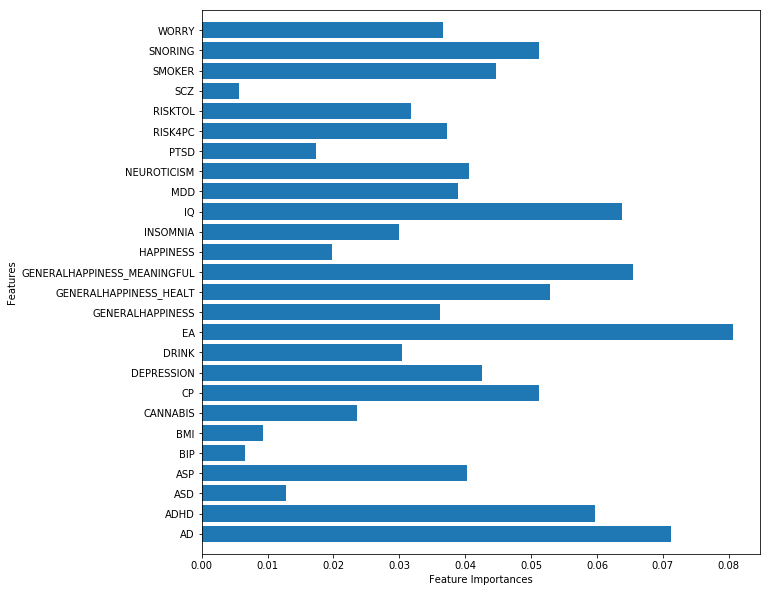

Feature Importances:
[0.0711514  0.05976696 0.01277848 0.04021473 0.00660311 0.00932957
 0.02359733 0.05114768 0.04252965 0.03036186 0.08065571 0.03617151
 0.05291202 0.06544173 0.01981531 0.02996291 0.06381924 0.03890724
 0.0405475  0.01729338 0.03721744 0.03173445 0.00561641 0.04472474
 0.05113483 0.03656481]


Train Accuracy Score:  0.014734622199967257
Test Accuracy Score:  0.03781024397598537
----------------------------
----------------------------
k fold:  0
[[0.99753748 0.00246252]
 [0.99766819 0.00233181]
 [0.99264685 0.00735315]
 ...
 [0.99769991 0.00230009]
 [0.99196789 0.00803211]
 [0.99612597 0.00387403]]


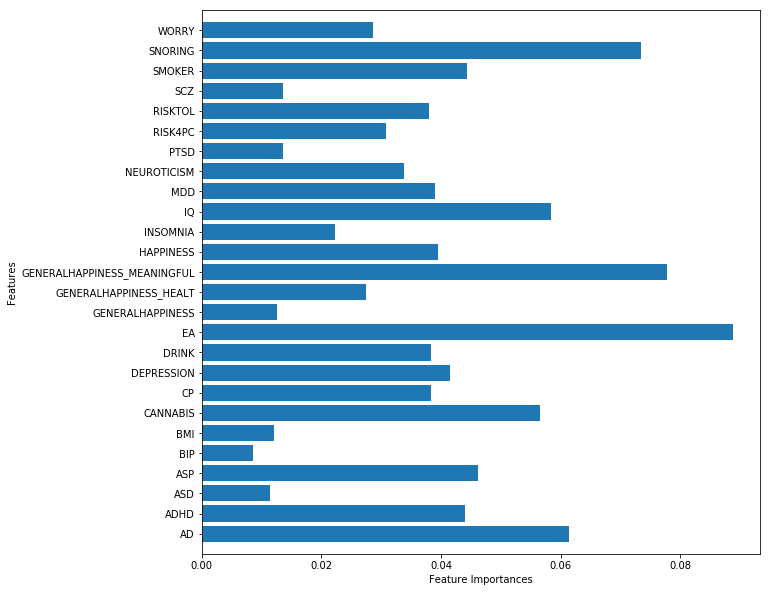

Feature Importances:
[0.06135605 0.04405896 0.01134374 0.04612714 0.00865257 0.01200147
 0.05648706 0.03828857 0.04146449 0.03839875 0.08881763 0.01259635
 0.02747356 0.07773781 0.03952334 0.02219518 0.05832393 0.03905086
 0.03384104 0.01353014 0.03078445 0.03803293 0.01362733 0.04429451
 0.07341034 0.02858178]


Train Accuracy Score:  0.014009016136634576
Test Accuracy Score:  0.04372519399920054
----------------------------
----------------------------
k fold:  0
[[0.99770886 0.00229114]
 [0.99622874 0.00377126]
 [0.99734631 0.00265369]
 ...
 [0.99791587 0.00208413]
 [0.99240674 0.00759326]
 [0.9955575  0.0044425 ]]


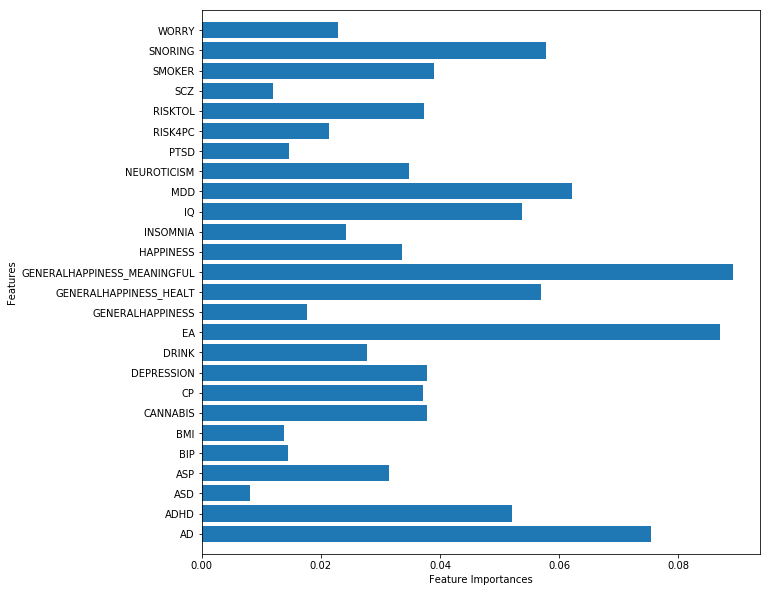

Feature Importances:
[0.07543035 0.05200971 0.00818164 0.031408   0.01448254 0.01383127
 0.03783944 0.03712803 0.03775265 0.02768582 0.08691563 0.01761871
 0.05698467 0.08918461 0.03356269 0.02427086 0.05370543 0.06220504
 0.03478592 0.01471999 0.02133037 0.03727157 0.01203305 0.03898168
 0.05774934 0.02293097]


Train Accuracy Score:  0.014483328252594982
Test Accuracy Score:  0.04100609436774074
----------------------------
----------------------------
k fold:  0
[[0.99645457 0.00354543]
 [0.99728366 0.00271634]
 [0.9822172  0.0177828 ]
 ...
 [0.99762597 0.00237403]
 [0.99562476 0.00437524]
 [0.99332911 0.00667089]]


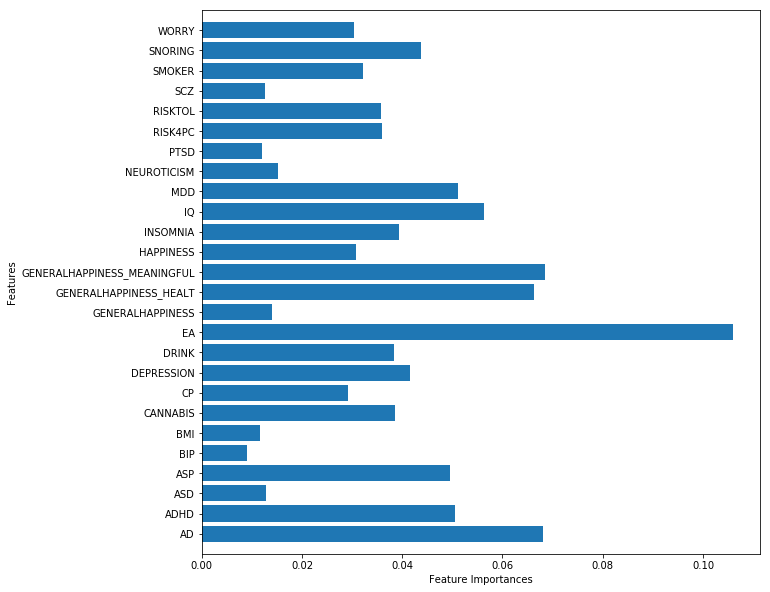

Feature Importances:
[0.06817996 0.05050502 0.01282876 0.04959135 0.00900143 0.0115776
 0.03861904 0.02923056 0.04161189 0.03839611 0.10601683 0.01406826
 0.06633503 0.06857184 0.03074845 0.03927613 0.05633074 0.0511371
 0.01528589 0.01201423 0.03594519 0.03575548 0.01253414 0.03215553
 0.04384833 0.03043513]


Train Accuracy Score:  0.015376536563266513
Test Accuracy Score:  0.04351658573168512
----------------------------
----------------------------
k fold:  0
[[0.98715003 0.01284997]
 [0.99649448 0.00350552]
 [0.99563    0.00437   ]
 ...
 [0.99290103 0.00709897]
 [0.99197992 0.00802008]
 [0.99821719 0.00178281]]


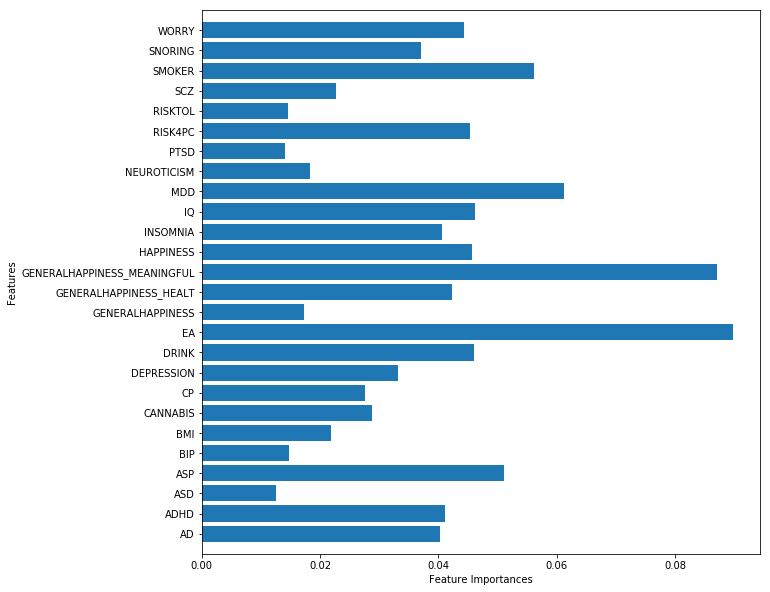

Feature Importances:
[0.04029995 0.04112642 0.01257192 0.05104396 0.01482465 0.02181812
 0.0287738  0.02751377 0.0332527  0.04608659 0.08980544 0.01723161
 0.04228312 0.08705524 0.04564486 0.04064005 0.04624498 0.06130812
 0.01827978 0.01399667 0.04527978 0.01459368 0.0226236  0.05622198
 0.03709081 0.04438838]


Train Accuracy Score:  0.015448522506827125
Test Accuracy Score:  0.035490855338061365
----------------------------


In [10]:
index_split = StratifiedKFold(n_splits=k_fold, random_state=123)

loop=0
for train_index, test_index in index_split.split(X, y):
    print('----------------------------')
    print('k fold: ', loop)
    
    train_index, test_index
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=5)
    
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict_proba(X_test)
    y_pred_train = rf.predict_proba(X_train)
    print(y_pred_train)
    plot_feature_importances(rf)
    
    print("Feature Importances:\n{}".format(rf.feature_importances_))

    print('\n')
    print('Train Accuracy Score: ', log_loss(y_train, y_pred_train))
#     print('Classification Report: ', classification_report(y_test, y_pred_test))
#     print('Confusion Matrix: ', confusion_matrix(y_test, y_pred_test))
    print('Test Accuracy Score: ', log_loss(y_test, y_pred_test))
    print('----------------------------')

Reference: https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

In [16]:
index_split = StratifiedKFold(n_splits=k_fold, random_state=123)
from sklearn.model_selection import cross_val_score

loop=0
for train_index, test_index in index_split.split(X, y):
    print('----------------------------')
    print('k fold: ', loop)
    
    train_index, test_index
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(n_estimators=100, max_depth=5)
    
    rf.fit(X_train, y_train)
    y_pred_test = rf.predict(X_test)
    
#     cv_score = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
    
    print("=== Confusion Matrix ===")
    print(confusion_matrix(y_test, y_pred_test))
    print('\n')
    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred_test))
    print('\n')
    print("=== Accuracy Score ===")
    print(accuracy_score(y_test, y_pred_test))
#     print("=== All AUC Scores ===")
#     print(cv_score)
#     print('\n')
#     print("=== Mean AUC Score ===")
#     print("Mean AUC Score - Random Forest: ", cv_score.mean())

----------------------------
k fold:  0
=== Confusion Matrix ===
[[899   0]
 [  6   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       899
        1.0       0.00      0.00      0.00         6

avg / total       0.99      0.99      0.99       905



=== Accuracy Score ===
0.9933701657458563
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[899   0]
 [  6   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       899
        1.0       0.00      0.00      0.00         6

avg / total       0.99      0.99      0.99       905



=== Accuracy Score ===
0.9933701657458563
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[898   0]
 [  6   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       898
        1.0       0.00      0.00      0.00         6

avg / total       0.99      0.99      0.99       904



=== Accuracy Score ===
0.9933628318584071
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[898   0]
 [  6   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       898
        1.0       0.00      0.00      0.00         6

avg / total       0.99      0.99      0.99       904



=== Accuracy Score ===
0.9933628318584071
----------------------------
k fold:  0


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


=== Confusion Matrix ===
[[898   0]
 [  5   0]]


=== Classification Report ===
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00       898
        1.0       0.00      0.00      0.00         5

avg / total       0.99      0.99      0.99       903



=== Accuracy Score ===
0.9944629014396457


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [1]:
sum(my_data[target])/len(my_data)*100

NameError: name 'my_data' is not defined